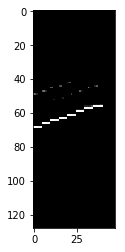

In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

spectro_file = os.path.join ('..', 'fft', 'test', 'c-major-scale-on-treble-clef.png')

img = Image.open (spectro_file).convert (mode='L')

plt.imshow (img)
plt.show ()

In [3]:
img.size

(48, 128)

In [4]:
img_arr = np.array (img)
img_arr.shape

(128, 48)

In [5]:
print (img_arr.shape[0]-np.argmax (img_arr, axis=0))

[ 60  60  60  60  60  62  62  62  62  62  64  64  64  64  64  65  65  65
  65  65  67  67  67  67  67  69  69  69  69  69  71  71  71  71  71  72
  72  72  72  72  72 128 128 128 128 128 128 128]


In [27]:
# run through all time chunks, get the corresponding pitch and add it to a list if not already in list

list_of_pitches_midi = np.empty (1).astype (int)
max_pitch_midi = img_arr.shape[0]
for i in range (img_arr.shape[1]):
    
    # check first if we have absolute silence in this time chunk = all values are zero
    if (img_arr[:,i].sum () == 0):
        continue
    
    pitch_midi = max_pitch_midi - img_arr[:,i].argmax ()
    if pitch_midi not in list_of_pitches_midi:
        list_of_pitches_midi = np.append (list_of_pitches_midi, pitch_midi)

list_of_pitches_midi = list_of_pitches_midi[1:]
print (list_of_pitches_midi)

[60 62 64 65 67 69 71 72]


In [28]:
# function: get key of array pixel value
import math

def get_music_key (arr_val):
    tone = arr_val % 12
    octave = math.floor (arr_val / 12) - 1
    
    return tone, octave

In [29]:
dict_music_keys = {'C':0, 'C#':1, 'D':2, 'D#':3, 'E':4, 'F':5, 'F#':6, 'G':7, 'G#':8, 'A':9, 'A#':10, 'B':11}

In [30]:
for arr_val in list_of_pitches_midi:
    for dict_key, dict_value in dict_music_keys.items ():
        tone, octave = get_music_key (arr_val)
        if (tone == dict_value):
            print ('{}{}'.format (dict_key, octave), end=', ', flush=True)
print ()

C4, D4, E4, F4, G4, A4, B4, C5, 


## Octave Transposition
---
"In music transposition refers to the process, or operation, of moving a collection of notes (pitches or pitch classes) up or down in pitch by a constant interval." (<a href='https://en.wikipedia.org/wiki/Transposition_(music)'>Wikipedia - Transposition (music)</a>)

_

*Octave Equivalency*

"[...] notes an octave apart are given the same note name in the Western system of music notation — the name of a note an octave above A is also A. This is called octave equivalency, the assumption that pitches one or more octaves apart are musically equivalent in many ways [...]" (<a href='https://en.wikipedia.org/wiki/Octave#Theory'>Wikipedia - Octave, Theory</a>)

_

*Transpositional Equivalence*

"Using integer notation and modulo 12, to transpose a pitch x by n semitones (pitch class transposition by a pitch class interval):" (<a href='https://en.wikipedia.org/wiki/Transposition_(music)#Transpositional_equivalence'>Wikipedia - Transpositional Equivalence</a>)

$T_n(x) = x + n (mod 12)$

_

"Transposing a melody up or down by one octave will not change the key." (<a href='http://brebru.com/musicroom/theory/lesson18/octavetrans.html'>brebru - octave transposition</a>)

In [31]:
print (list_of_pitches_midi)

[60 62 64 65 67 69 71 72]


In [35]:
# check if min/max value out of 12-TET bounds after transposition
semitones_to_transpose = 12
min_oob = False
max_oob = False

if (list_of_pitches_midi.min ()-semitones_to_transpose < 0):
    print ('  [i] min pitch would be out of bounds after transposition')
    min_oob = True
if (list_of_pitches_midi.max ()+semitones_to_transpose > 127):
    print ('  [i] max pitch would be out of bounds after transposition')
    max_oob = True

if (min_oob or max_oob):
    pass

In [72]:
# go through every column of the image and move every value 12 indices up (or down)

# - one octave up
# array with 12 more rows
img_arr_oct_up = np.copy (img_arr[semitones_to_transpose:])
img_arr_oct_up = np.vstack ((img_arr_oct_up, np.zeros ((semitones_to_transpose, img_arr_oct_up.shape[1]))))


# - one octave down
img_arr_oct_dwn = np.copy (img_arr[:-semitones_to_transpose])
img_arr_oct_dwn = np.vstack ((np.zeros ((semitones_to_transpose, img_arr_oct_dwn.shape[1])), img_arr_oct_dwn))

In [73]:
print (img_arr_oct_up.shape)
print (img_arr_oct_dwn.shape)

(128, 48)
(128, 48)


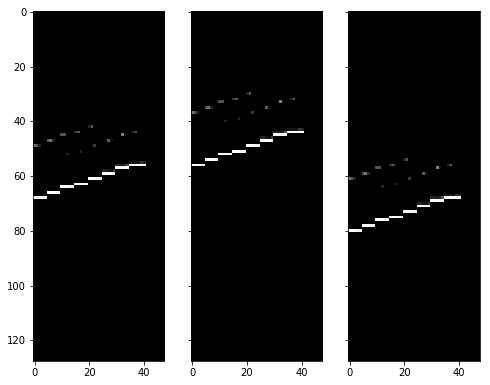

In [76]:
img_oct_up = Image.fromarray (img_arr_oct_up)
img_oct_dwn = Image.fromarray (img_arr_oct_dwn)

fig, axs= plt.subplots (1, 3, sharex=True, sharey=True)
axs[0].imshow (img)
axs[1].imshow (img_oct_up)
axs[2].imshow (img_oct_dwn)

fig.set_size_inches (8, 14)
plt.show ()

In [78]:
list_of_pitches_midi_oct_up = np.empty (1).astype (int)
max_pitch_midi_oct_up = img_arr_oct_up.shape[0]
for i in range (img_arr_oct_up.shape[1]):
    
    # check first if we have absolute silence in this time chunk = all values are zero
    if (img_arr_oct_up[:,i].sum () == 0):
        continue
    
    pitch_midi = max_pitch_midi_oct_up - img_arr_oct_up[:,i].argmax ()
    if pitch_midi not in list_of_pitches_midi_oct_up:
        list_of_pitches_midi_oct_up = np.append (list_of_pitches_midi_oct_up, pitch_midi)

list_of_pitches_midi_oct_up = list_of_pitches_midi_oct_up[1:]
print (list_of_pitches_midi_oct_up)



list_of_pitches_midi_oct_dwn = np.empty (1).astype (int)
max_pitch_midi_oct_dwn = img_arr_oct_dwn.shape[0]
for i in range (img_arr_oct_dwn.shape[1]):
    
    # check first if we have absolute silence in this time chunk = all values are zero
    if (img_arr_oct_dwn[:,i].sum () == 0):
        continue
    
    pitch_midi = max_pitch_midi_oct_dwn - img_arr_oct_dwn[:,i].argmax ()
    if pitch_midi not in list_of_pitches_midi_oct_dwn:
        list_of_pitches_midi_oct_dwn = np.append (list_of_pitches_midi_oct_dwn, pitch_midi)

list_of_pitches_midi_oct_dwn = list_of_pitches_midi_oct_dwn[1:]
print (list_of_pitches_midi_oct_dwn)

[72 74 76 77 79 81 83 84]
[48 50 52 53 55 57 59 60]


In [79]:
for arr_val in list_of_pitches_midi_oct_up:
    for dict_key, dict_value in dict_music_keys.items ():
        tone, octave = get_music_key (arr_val)
        if (tone == dict_value):
            print ('{}{}'.format (dict_key, octave), end=', ', flush=True)
print ()

for arr_val in list_of_pitches_midi_oct_dwn:
    for dict_key, dict_value in dict_music_keys.items ():
        tone, octave = get_music_key (arr_val)
        if (tone == dict_value):
            print ('{}{}'.format (dict_key, octave), end=', ', flush=True)
print ()

C5, D5, E5, F5, G5, A5, B5, C6, 
C3, D3, E3, F3, G3, A3, B3, C4, 
